In [3]:
# Embeddings from scratch - building word2vec

In [4]:
import torch

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
with open('breaking_bad_s02e08.txt', 'r') as file:
    text1 = file.read()
with open('breaking_bad_s02e09.txt', 'r') as file:
    text2 = file.read()
with open('breaking_bad_s02e10.txt', 'r') as file:
    text3 = file.read()

text = text1 + ' ' + text2 + ' ' + text3

In [8]:
import re
text = text.replace("\n", " ")
text = text.replace("  ", " ")
text = re.sub(r"[^a-zA-Z ]", "", text.lower())
print(text)

scene bench cop you selling badger i dont know what youre talking about cop thats cool im just saying you know if you were selling i could maybe do with a teenth badger youre kidding right dude i so smell bacon cop what what are you talking about badger gee i dont know how about over there that brown van thats yours right cop what brown van badger parked all inconspicuous its a cop van another one right over there duke city flowers come on cant you at least be original cop dude i just want to get high badger a flower van you know what you should do is a garbage truck seriously and i dont mean to disrespect but if you put a bunch of cops in the back of a garbage truck theres no way im seriously thinking that theres cops in the back of a garbage truck its a freebie yo just think about it think about it boys cop all right im hitting it badger you dudes give up that easy cop im not a cop badger then lift your shirt show me youre not wearing a wire cop all right you know what just to show y

In [9]:
# !pip install nltk

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import pos_tag
stop_words = set(stopwords.words('english'))
# text = " ".join([word for word in text.split() if word not in stop_words])
words = text.split(" ")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 123.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
import re

def tokenize(text):
    text = text.lower().replace('.', '').replace(',', '').split(' ')
    return text

In [14]:
tokens = tokenize(text)

In [15]:
def map_tokens(tokens):
    token_to_id = {}
    id_to_token = {}
    unique_tokens = sorted(set(tokens))

    for i, token in enumerate(unique_tokens):
        token_to_id[token] = i
        id_to_token[i] = token


    return token_to_id, id_to_token

In [16]:
token_to_id, id_to_token = map_tokens(tokens)

In [17]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [22]:
def one_hot_encode(id, vocab_size):
    vec = torch.zeros(vocab_size, device=device)
    vec[id] = 1
    return vec

In [23]:
# !pip install numpy

In [28]:
import numpy as np
def generate_training_data(tokens, token_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = list(range(max(0, i - window), i)) + list(range(i + 1, min(n_tokens, i + window + 1)))
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(token_to_id[tokens[i]], len(token_to_id)))  # Append as PyTorch tensors
            y.append(one_hot_encode(token_to_id[tokens[j]], len(token_to_id)))  # Append as PyTorch tensors

    X = torch.stack(X, dim=0)  # Stack all tensors into a batch
    y = torch.stack(y, dim=0)  # Stack all tensors into a batch

    return X, y

In [29]:
X, y = generate_training_data(tokens, token_to_id, 3)

In [30]:
def initialise_model(vocab_size, n_embedding):
    model = {
        "w1": torch.randn(vocab_size, n_embedding, requires_grad=True, device=device),
        "w2": torch.randn(n_embedding, vocab_size, requires_grad=True, device=device)
    }
    return model

In [31]:
model = initialise_model(len(token_to_id), 15)

In [52]:
import torch.nn.functional as F

def forward(model, X, return_cache=True):
    cache = {}
    cache["a1"] = X @ model["w1"]  # w1 is the dense representation
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = F.softmax(cache["a2"], dim=-1)

    if not return_cache:
        return cache["z"]
    return cache

In [53]:
# def softmax(X):
#     res = []
#     for x in X:
#         exp = np.exp(x)
#         res.append(exp / exp.sum())

#     return res

In [58]:
def backward(model, X, y, lr):
    cache = forward(model, X)
    da2 = cache["z"] - y  # predicted minus actual
    dw2 = cache["a1"].T @ da2  #
    da1 = da2 @ model["w2"].T  #
    dw1 = X.T @ da1

    with torch.no_grad():
        model["w1"] -= lr * dw1
        model["w2"] -= lr * dw2

    return cross_entropy(cache["z"], y)

In [62]:
def cross_entropy(z, y):
    return -torch.sum(y * torch.log(z))

In [63]:
# !pip install matplotlib

Loop number: 1, Loss: 327132.96875
Loop number: 2, Loss: 321410.8125
Loop number: 3, Loss: 320126.75
Loop number: 4, Loss: 319989.1875
Loop number: 5, Loss: 319939.0625
Loop number: 6, Loss: 319907.0
Loop number: 7, Loss: 319884.8125
Loop number: 8, Loss: 319868.75
Loop number: 9, Loss: 319856.59375
Loop number: 10, Loss: 319847.0625
Loop number: 11, Loss: 319839.3125
Loop number: 12, Loss: 319832.8125
Loop number: 13, Loss: 319827.21875
Loop number: 14, Loss: 319822.28125
Loop number: 15, Loss: 319817.875
Loop number: 16, Loss: 319813.84375
Loop number: 17, Loss: 319810.09375
Loop number: 18, Loss: 319806.625
Loop number: 19, Loss: 319803.375
Loop number: 20, Loss: 319800.3125
Loop number: 21, Loss: 319797.375
Loop number: 22, Loss: 319794.5625
Loop number: 23, Loss: 319791.9375
Loop number: 24, Loss: 319789.375
Loop number: 25, Loss: 319786.90625
Loop number: 26, Loss: 319784.5
Loop number: 27, Loss: 319782.21875
Loop number: 28, Loss: 319779.96875
Loop number: 29, Loss: 319777.8125


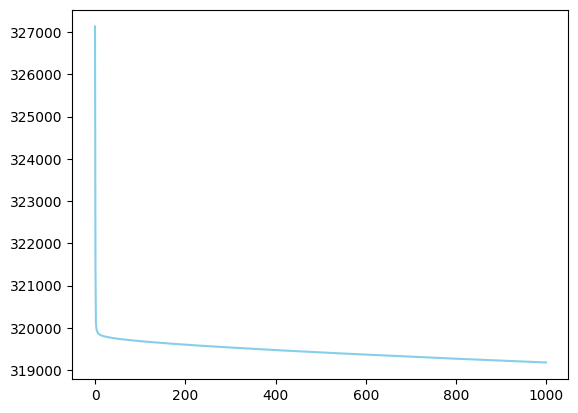

In [67]:
import matplotlib.pyplot as plt
n_iter = 1000
learning_rate = 0.00025

history = []
for i in range(n_iter):
    loss = backward(model, X, y, learning_rate)
    history.append(loss.cpu().item())  # Move loss to CPU before converting to scalar
    print(f'Loop number: {i+1}, Loss: {loss.cpu().item()}')

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [ ]:
# def get_embedding(model, token):
#     try:
#         idx = token_to_id[token]
#     except:
#         print(f'{token} not found in dataset')
#     one_hot = one_hot_encode(idx, len(token_to_id))
#     return forward(model, one_hot)

In [ ]:
# # some examples
# embeddings_arrangement = get_embedding(model, "arrangement")["a1"]
# embeddings_sound = get_embedding(model, "sound")["a1"]
# embeddings_elements = get_embedding(model, "elements")["a1"]
# embeddings_mechanically = get_embedding(model, "mechanically")["a1"]


In [ ]:
# # calculating the dot product
# similarity = np.dot(embeddings_arrangement, embeddings_sound)
# print(similarity)

In [ ]:
# # normalising the dot product to calculate the cosine similarity
# cosine_similarity = np.dot(embeddings_arrangement, embeddings_sound) / (
#     np.linalg.norm(embeddings_arrangement) * np.linalg.norm(embeddings_sound)
# )
# print(cosine_similarity)


In [ ]:
# !pip install scikit-learn

In [ ]:
# all_embeddings = model["w1"]

In [ ]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# vocab = set(words)
# doc = nlp(text)
# entities = [(ent.text, ent.label_) for ent in doc.ents]
# # print(entities)

# nouns = []
# for i in range(len(entities)):
#     nouns.append(entities[i][0])

# # convert to one-hot encodings
# nouns = " ".join(nouns)
# nouns_words = nouns.split(" ")
# nouns_words = list(set(nouns_words))
# print(nouns_words)
# nouns_words_long = [tok for tok in nouns_words if len(tok) > 0]
# print(nouns_words_long)


['', 'walter', 'month', 'every', 'kller', 'brandon', 'dck', 'fredo', 'house', 'asshle', 'kll', 'yesterday', 'irish', 'exxon', 'hours', 'valdez', 'vito', 'sauls', 'paso', 'last', 'an', 'city', 'van', 'mayhew', 'afternoon', 'corleone', 'one', 'saturday', 'tonight', 'pounds', 'american', 'badger', 'hank', 'ago', 'paco', 'jack', 'hourly', 'fbi', 'steve', 'kinda', 'three', 'tomorrow', 'months', 'minutes', 'jimmy', 'years', 'four', 'gomez', 'cheer', 'juarez', 'heisenberg', 'second', 'fine', 'clinton', 'of', 'mr', 'weeks', 'two', 'kilkelly', 'than', 'end', 'meth', 'scene', 'eight', 'voicemail', 'hour', 'james', 'a', 'jesse', 'innout', 'thank', 'night', 'go', 'saul', 'goodman', 'jesus', 'first', 'brown', 'edward', 'the', 'five', 'quarter', 'about', 'weekend', 'el', 'iraq', 'wait', 'minute', 'teenth', 'dea', 'secondly', 'more', 'maries', 'today', 'chinese', 'ten', 'this', 'english']
['walter', 'month', 'every', 'kller', 'brandon', 'dck', 'fredo', 'house', 'asshle', 'kll', 'yesterday', 'irish', 

In [68]:
tokens = set(list(tokens))

In [69]:
ohes = []
for n in tokens:
    ohe = one_hot_encode(token_to_id[n], len(token_to_id))
    ohes.append(ohe)
print(len(ohes))


1887


In [77]:
import numpy as np
ohe_stack = torch.stack(ohes, dim=1)

In [78]:
print(ohe_stack.shape)
print(model["w1"].shape)

torch.Size([1887, 1887])
torch.Size([1887, 15])


In [81]:
w1s = ohe_stack.T @ model["w1"]
w1s_np = w1s.cpu().detach().numpy()

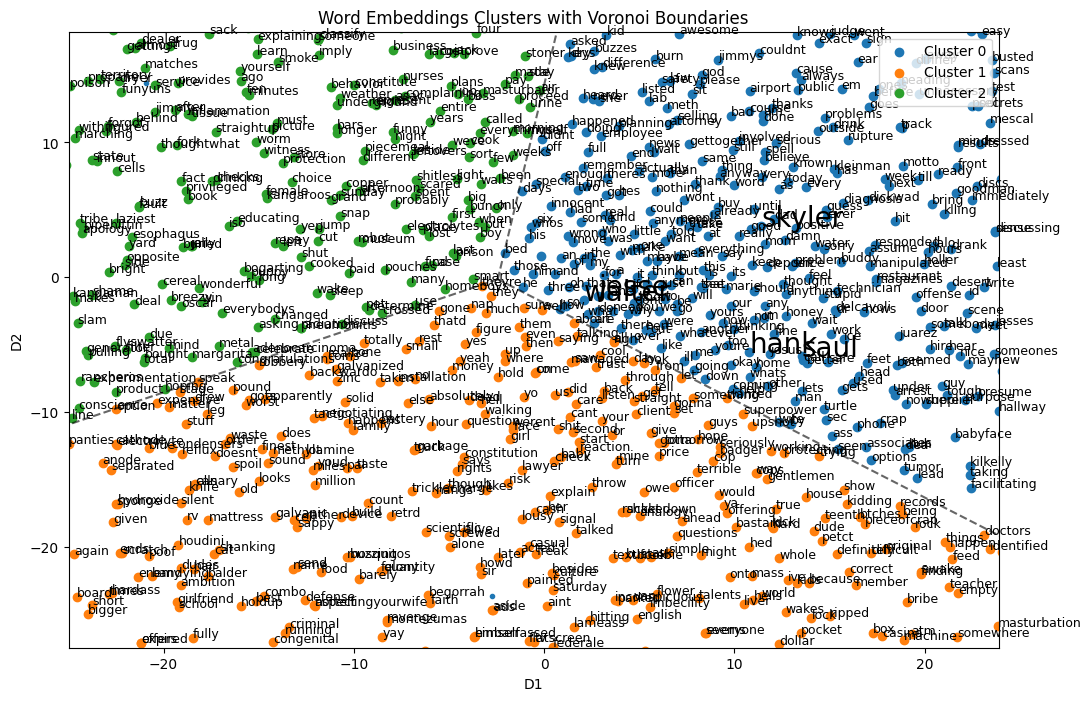

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(w1s_np)  # Shape: (101, 2)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(embeddings_2d)
cluster_centers = kmeans.cluster_centers_

vor = Voronoi(cluster_centers)
plt.figure(figsize=(12, 8))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='black', line_width=1.5, line_alpha=0.6)

for i in range(n_clusters):
    points = embeddings_2d[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')

vocabulary = list(tokens)
for i, word in enumerate(vocabulary):
    if word in ('heisenberg', 'walter', 'saul', 'hank', 'jesse', 'skyler'):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=20)
    else:
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=9)

plt.legend()
plt.title("Word Embeddings Clusters with Voronoi Boundaries")
plt.xlabel("D1")
plt.ylabel("D2")
plt.show()

In [ ]:
# start getting some gradio UI going

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
demo = gr.Interface(
    fn=lambda x: f"Selected file: {x}",
    inputs=gr.Dropdown(choices=["breaking_bad_s02e08.txt", "tiny_shakespeare_portion.txt", "seinfeld_the_opposite.txt"], label="Select a text file"),
    outputs="text"
)

In [ ]:
demo.launch()